## TDA: Optimizing NN hyper-parameters with Bayesian

In [148]:
# Load in data
import pandas as pd
df = pd.read_csv("Data\Well_Log_Facies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


Predict facies.

In [149]:
# Shuffle dataframe using sample function
df = df.sample(frac=1)

# Select ratio
train_ratio = 0.8
val_ratio = 0.25

total_rows = df.shape[0]
train_size = int(total_rows*train_ratio)
 
# Split data into test and train
train_df = df[0:train_size]
test_df = df[train_size:]

train_df = train_df.sample(frac = 1)

# Validation Set
val_size = int(train_df.shape[0]*val_ratio)
val_df = train_df[0:val_size]




In [150]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2585 entries, 131 to 2210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     2585 non-null   int64  
 1   Formation  2585 non-null   object 
 2   Well Name  2585 non-null   object 
 3   Depth      2585 non-null   float64
 4   GR         2585 non-null   float64
 5   ILD_log10  2585 non-null   float64
 6   DeltaPHI   2585 non-null   float64
 7   PHIND      2585 non-null   float64
 8   PE         2585 non-null   float64
 9   NM_M       2585 non-null   int64  
 10  RELPOS     2585 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 242.3+ KB


### Generate Synthetic Data

In [151]:
# Create unique identifying column that must be string
train_df = train_df.assign(Index = range(len(train_df)))
train_df['Index'] = train_df['Index'].astype('string')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2585 entries, 131 to 2210
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     2585 non-null   int64  
 1   Formation  2585 non-null   object 
 2   Well Name  2585 non-null   object 
 3   Depth      2585 non-null   float64
 4   GR         2585 non-null   float64
 5   ILD_log10  2585 non-null   float64
 6   DeltaPHI   2585 non-null   float64
 7   PHIND      2585 non-null   float64
 8   PE         2585 non-null   float64
 9   NM_M       2585 non-null   int64  
 10  RELPOS     2585 non-null   float64
 11  Index      2585 non-null   string 
dtypes: float64(7), int64(2), object(2), string(1)
memory usage: 262.5+ KB


In [152]:
train_df = train_df.drop(['Formation', 'Well Name'], axis = 1)
test_df = test_df.drop(['Formation', 'Well Name'], axis = 1)
val_df = val_df.drop(['Formation', 'Well Name'], axis = 1)

array([[<AxesSubplot: title={'center': 'Facies'}>,
        <AxesSubplot: title={'center': 'Depth'}>,
        <AxesSubplot: title={'center': 'GR'}>],
       [<AxesSubplot: title={'center': 'ILD_log10'}>,
        <AxesSubplot: title={'center': 'DeltaPHI'}>,
        <AxesSubplot: title={'center': 'PHIND'}>],
       [<AxesSubplot: title={'center': 'PE'}>,
        <AxesSubplot: title={'center': 'NM_M'}>,
        <AxesSubplot: title={'center': 'RELPOS'}>]], dtype=object)

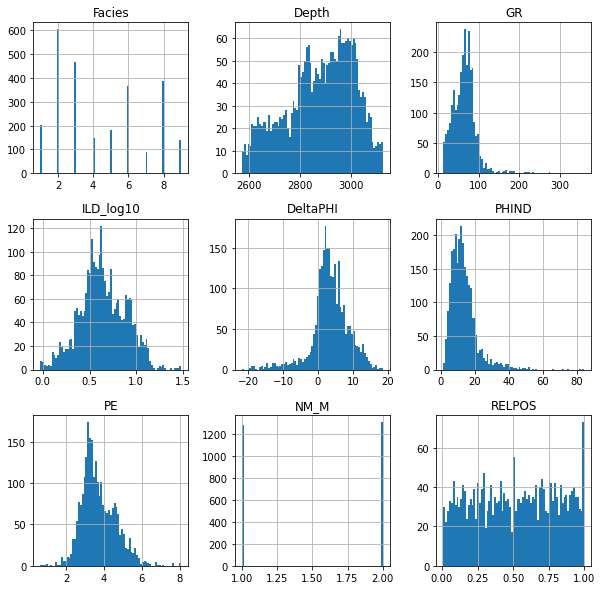

In [153]:
train_df.hist(bins= 75, figsize= (10,10))

In [154]:
# Create Metadata
from sdv.metadata import SingleTableMetadata

# Intialize
metadata = SingleTableMetadata()

# Obtain metadata
metadata.detect_from_dataframe(data = train_df)

# Update metadata metadata for Facies and Index

metadata.update_column(
    column_name = 'Facies',
    sdtype = 'categorical'
)

metadata.update_column(
    column_name = 'Index',
    sdtype = 'id',
    regex_format = '[0-9]{1,4}'
)

# Set Primary Key
metadata.set_primary_key(
    column_name = 'Index'
)

In [155]:
from sdv.single_table import CTGANSynthesizer

ctgan = CTGANSynthesizer(
    metadata,
    enforce_rounding = False,
    epochs = 500,
    verbose = True,
    cuda = True
)

ctgan.fit(train_df)

c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 

Epoch 1, Loss G:  2.1658,Loss D: -0.0160
Epoch 2, Loss G:  2.1314,Loss D: -0.0130
Epoch 3, Loss G:  1.9806,Loss D: -0.0684
Epoch 4, Loss G:  1.8800,Loss D:  0.0675
Epoch 5, Loss G:  1.6520,Loss D:  0.1116
Epoch 6, Loss G:  1.6414,Loss D:  0.1403
Epoch 7, Loss G:  1.6871,Loss D:  0.0572
Epoch 8, Loss G:  1.6029,Loss D:  0.0472
Epoch 9, Loss G:  1.5584,Loss D: -0.1503
Epoch 10, Loss G:  1.6338,Loss D: -0.1973
Epoch 11, Loss G:  1.7400,Loss D: -0.2390
Epoch 12, Loss G:  1.5251,Loss D: -0.0458
Epoch 13, Loss G:  1.3686,Loss D:  0.1045
Epoch 14, Loss G:  1.3113,Loss D:  0.1624
Epoch 15, Loss G:  1.3306,Loss D:  0.1848
Epoch 16, Loss G:  1.2044,Loss D:  0.1698
Epoch 17, Loss G:  1.2244,Loss D:  0.0450
Epoch 18, Loss G:  1.0648,Loss D:  0.0137
Epoch 19, Loss G:  1.0524,Loss D:  0.1553
Epoch 20, Loss G:  1.0104,Loss D: -0.0027
Epoch 21, Loss G:  0.9180,Loss D:  0.0531
Epoch 22, Loss G:  0.8968,Loss D:  0.0075
Epoch 23, Loss G:  0.8448,Loss D:  0.0491
Epoch 24, Loss G:  0.7606,Loss D: -0.0929
E

In [156]:
from sdv.evaluation.single_table import run_diagnostic

train_synthetic = ctgan.sample(
    batch_size = 100,
    num_rows = 2701
)

diagnostic_ctgan = run_diagnostic(
    real_data = train_df,
    synthetic_data = train_synthetic,
    metadata = metadata
)

Sampling rows: : 2800it [00:00, 3043.48it/s]                        


Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:12<00:00, 12.01s/it]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data

! The synthetic data is missing more than 10% of the numerical ranges present in the real data


In [157]:
from sdv.evaluation.single_table import evaluate_quality

ctgan_quality = evaluate_quality(
    real_data = train_df,
    synthetic_data = train_synthetic,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:00<00:00, 179.28it/s]

Overall Quality Score: 81.83%

Properties:
- Column Shapes: 90.34%
- Column Pair Trends: 73.31%


In [158]:
# Augment original training set
train_augmented = pd.concat([train_df, train_synthetic], axis = 0)

Compare distributions

array([[<AxesSubplot: title={'center': 'Facies'}>,
        <AxesSubplot: title={'center': 'Depth'}>,
        <AxesSubplot: title={'center': 'GR'}>],
       [<AxesSubplot: title={'center': 'ILD_log10'}>,
        <AxesSubplot: title={'center': 'DeltaPHI'}>,
        <AxesSubplot: title={'center': 'PHIND'}>],
       [<AxesSubplot: title={'center': 'PE'}>,
        <AxesSubplot: title={'center': 'NM_M'}>,
        <AxesSubplot: title={'center': 'RELPOS'}>]], dtype=object)

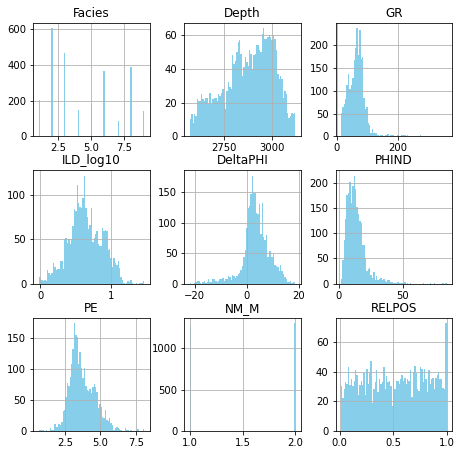

In [159]:
train_df.drop('Index', axis = 1).hist(bins = 75, figsize = (7.5,7.5), color = 'skyblue')

array([[<AxesSubplot: title={'center': 'Facies'}>,
        <AxesSubplot: title={'center': 'Depth'}>,
        <AxesSubplot: title={'center': 'GR'}>],
       [<AxesSubplot: title={'center': 'ILD_log10'}>,
        <AxesSubplot: title={'center': 'DeltaPHI'}>,
        <AxesSubplot: title={'center': 'PHIND'}>],
       [<AxesSubplot: title={'center': 'PE'}>,
        <AxesSubplot: title={'center': 'NM_M'}>,
        <AxesSubplot: title={'center': 'RELPOS'}>]], dtype=object)

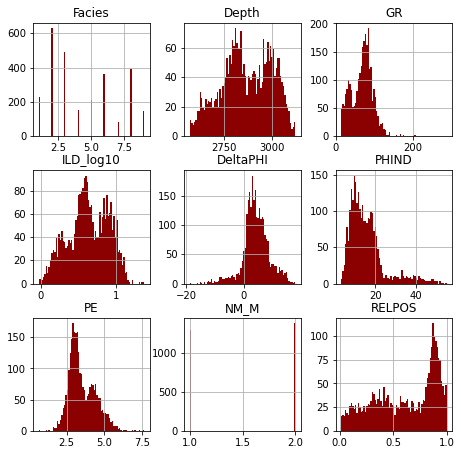

In [160]:
train_synthetic.drop('Index', axis = 1).hist(bins = 75, figsize = (7.5,7.5), color = 'darkred')

array([[<AxesSubplot: title={'center': 'Facies'}>,
        <AxesSubplot: title={'center': 'Depth'}>,
        <AxesSubplot: title={'center': 'GR'}>],
       [<AxesSubplot: title={'center': 'ILD_log10'}>,
        <AxesSubplot: title={'center': 'DeltaPHI'}>,
        <AxesSubplot: title={'center': 'PHIND'}>],
       [<AxesSubplot: title={'center': 'PE'}>,
        <AxesSubplot: title={'center': 'NM_M'}>,
        <AxesSubplot: title={'center': 'RELPOS'}>]], dtype=object)

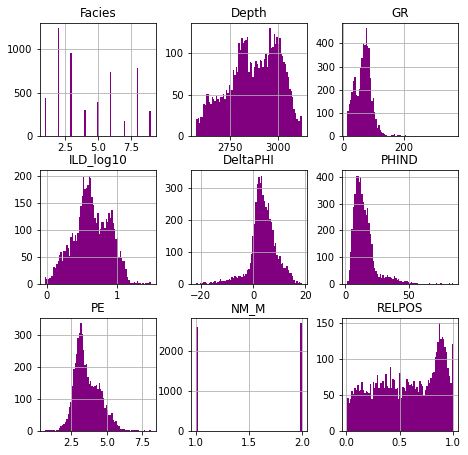

In [161]:
train_augmented.drop('Index', axis = 1).hist(bins = 75, figsize = (7.5,7.5), color = 'purple')

In [162]:
train_df = train_df.drop('Index', axis = 1)
train_augmented = train_augmented.drop('Index', axis = 1)

In [163]:
train_x = train_df.drop('Facies', axis = 1)
train_y = train_df['Facies']

aug_x = train_augmented.drop('Facies', axis = 1)
aug_y = train_augmented['Facies']

test_x = test_df.drop('Facies', axis = 1)
test_y = test_df['Facies']

val_x = val_df.drop('Facies', axis = 1)
val_y = val_df['Facies']

In [164]:
test_y

2517    2
377     8
1864    8
191     6
1362    6
       ..
882     6
1132    8
2108    2
1323    6
1039    8
Name: Facies, Length: 647, dtype: int64

In [179]:
# With just train data
import numpy as np
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier().fit(train_x, train_y)

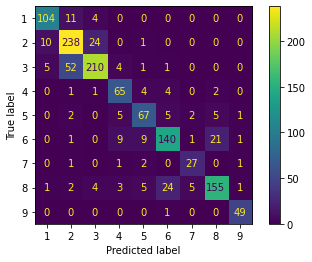

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, balanced_accuracy_score
import matplotlib.pyplot as plt
base_pred = tree_clf.predict(X)
cm = confusion_matrix(Y, base_pred, labels= tree_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

In [186]:
balanced_accuracy_score(Y, base_pred)

0.8330251974192137

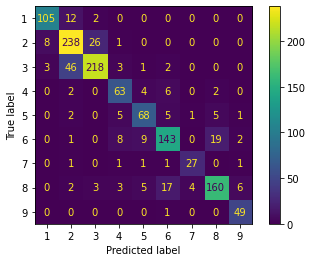

In [189]:

tree_clf = DecisionTreeClassifier().fit(aug_x, aug_y)
pred2 = tree_clf.predict(X)
cm = confusion_matrix(Y, pred2, labels= tree_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

In [190]:
balanced_accuracy_score(Y, pred2)

0.840215323422727

In [60]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris.data
y = iris.target


In [178]:
X = pd.concat([test_x, val_x], axis = 0)
Y = pd.concat([test_y, val_y], axis = 0)